In [23]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f8019f1ca1084ee28fb6bf65d6af9097',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-12-03T12:19:30.667Z', 'error_code': 0, 'error_message': None, 'elapsed': 143, 'credit_count': 1, 'notice': None, 'total_count': 9066}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12489, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [13]:
type(data)

dict

In [25]:
import pandas as pd 

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
df = pd.json_normalize(data["data"])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12489,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995709e+07,1.995709e+07,False,1.853577e+12,NaN,1,NaN,NaN,None,2025-12-03T12:17:00.000Z,92878.118453,8.565326e+10,19.3931,0.092035,6.193102,7.358568,-14.081131,-23.961469,-16.389358,1.853577e+12,58.9186,1.950440e+12,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771
1,1027,Ethereum,ETH,ethereum,11221,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206954e+08,1.206954e+08,True,3.710033e+11,NaN,2,NaN,NaN,None,2025-12-03T12:17:00.000Z,3073.880322,3.018251e+10,17.8421,0.596813,8.673093,6.162253,-17.468844,-31.536521,-30.439240,3.710033e+11,11.7929,3.710033e+11,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771
2,825,Tether USDt,USDT,tether,160575,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.846881e+11,1.878597e+11,True,1.879083e+11,NaN,3,NaN,NaN,None,2025-12-03T12:17:00.000Z,1.000259,1.283602e+11,22.1972,0.024288,0.010272,0.050867,0.039284,-0.010431,-0.015894,1.847358e+11,5.8721,1.879083e+11,None,2025-12-03T12:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-03 13:20:42.597771
3,52,XRP,XRP,xrp,1763,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.033164e+10,9.998575e+10,False,2.175218e+11,NaN,4,NaN,NaN,None,2025-12-03T12:17:00.000Z,2.175528,4.798694e+09,19.4793,0.181756,6.738144,0.822854,-9.676404,-27.296395,-23.544327,1.312532e+11,4.1721,2.175528e+11,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771
4,1839,BNB,BNB,bnb,2989,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377362e+08,1.377362e+08,1.377362e+08,False,1.239381e+11,NaN,5,NaN,NaN,None,2025-12-03T12:18:00.000Z,899.822752,2.441420e+09,13.2792,0.438555,6.744605,5.452203,-12.005260,-21.866888,5.934734,1.239381e+11,3.9399,1.239381e+11,None,2025-12-03T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771
5,5426,Solana,SOL,solana,1055,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.597759e+08,6.153476e+08,True,8.718743e+10,NaN,6,5.252369e+08,7.441981e+10,None,2025-12-03T12:17:00.000Z,141.688091,6.997039e+09,48.8053,0.381188,10.246528,4.045454,-19.544589,-38.172340,-31.940105,7.931357e+10,2.5211,8.718743e+10,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771
6,3408,USDC,USDC,usd-coin,35090,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.786473e+10,7.786473e+10,False,7.785974e+10,NaN,7,6.090122e+10,6.089732e+10,None,2025-12-03T12:17:00.000Z,0.999936,1.569606e+10,14.1302,0.005226,-0.011295,0.007993,0.004948,0.021429,0.001639,7.785974e+10,2.4749,7.785974e+10,None,2025-12-03T12:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-03 13:20:42.597771
7,1958,TRON,TRX,tron,1263,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.467928e+10,9.467929e+10,True,2.654315e+10,NaN,8,9.466789e+10,2.653995e+10,None,2025-12-03T12:18:00.000Z,0.280348,6.952455e+08,9.5389,0.390044,0.950511,1.843169,-4.380642,-17.703043,-17.326239,2.654314e+10,0.8438,2.654315e+10,None,2025-12-03T12:1

In [37]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
}
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f8019f1ca1084ee28fb6bf65d6af9097',
}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e) 



    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

In [40]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12489,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995709e+07,1.995709e+07,False,1.853577e+12,NaN,1,NaN,NaN,None,2025-12-03T12:17:00.000Z,92878.118453,8.565326e+10,19.3931,0.092035,6.193102,7.358568,-14.081131,-23.961469,-16.389358,1.853577e+12,58.9186,1.950440e+12,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
1,1027,Ethereum,ETH,ethereum,11221,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206954e+08,1.206954e+08,True,3.710033e+11,NaN,2,NaN,NaN,None,2025-12-03T12:17:00.000Z,3073.880322,3.018251e+10,17.8421,0.596813,8.673093,6.162253,-17.468844,-31.536521,-30.439240,3.710033e+11,11.7929,3.710033e+11,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
2,825,Tether USDt,USDT,tether,160575,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.846881e+11,1.878597e+11,True,1.879083e+11,NaN,3,NaN,NaN,None,2025-12-03T12:17:00.000Z,1.000259,1.283602e+11,22.1972,0.024288,0.010272,0.050867,0.039284,-0.010431,-0.015894,1.847358e+11,5.8721,1.879083e+11,None,2025-12-03T12:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-03 13:20:42.597771,NaT
3,52,XRP,XRP,xrp,1763,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.033164e+10,9.998575e+10,False,2.175218e+11,NaN,4,NaN,NaN,None,2025-12-03T12:17:00.000Z,2.175528,4.798694e+09,19.4793,0.181756,6.738144,0.822854,-9.676404,-27.296395,-23.544327,1.312532e+11,4.1721,2.175528e+11,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
4,1839,BNB,BNB,bnb,2989,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377362e+08,1.377362e+08,1.377362e+08,False,1.239381e+11,NaN,5,NaN,NaN,None,2025-12-03T12:18:00.000Z,899.822752,2.441420e+09,13.2792,0.438555,6.744605,5.452203,-12.005260,-21.866888,5.934734,1.239381e+11,3.9399,1.239381e+11,None,2025-12-03T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
5,5426,Solana,SOL,solana,1055,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.597759e+08,6.153476e+08,True,8.718743e+10,NaN,6,5.252369e+08,7.441981e+10,None,2025-12-03T12:17:00.000Z,141.688091,6.997039e+09,48.8053,0.381188,10.246528,4.045454,-19.544589,-38.172340,-31.940105,7.931357e+10,2.5211,8.718743e+10,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
6,3408,USDC,USDC,usd-coin,35090,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.786473e+10,7.786473e+10,False,7.785974e+10,NaN,7,6.090122e+10,6.089732e+10,None,2025-12-03T12:17:00.000Z,0.999936,1.569606e+10,14.1302,0.005226,-0.011295,0.007993,0.004948,0.021429,0.001639,7.785974e+10,2.4749,7.785974e+10,None,2025-12-03T12:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-03 13:20:42.597771,NaT
7,1958,TRON,TRX,tron,1263,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.467928e+10,9.467929e+10,True,2.654315e+10,NaN,8,9.466789e+10,2.653995e+10,None,2025-12-03T12:18:00.000Z,0.280348,6.952455e+08,9.5389,0.390044,0.950511,1.843169,-4.380642,-17.703043,-17.326239,2.654314e+10,0.

In [42]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [43]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12489,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19957093.00000,19957093.00000,False,1853577247630.16992,NaN,1,NaN,NaN,None,2025-12-03T12:17:00.000Z,92878.11845,85653262816.59999,19.39310,0.09203,6.19310,7.35857,-14.08113,-23.96147,-16.38936,1853577247630.16992,58.91860,1950440487511.56006,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
1,1027,Ethereum,ETH,ethereum,11221,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120695439.03202,120695439.03202,True,371003334937.33002,NaN,2,NaN,NaN,None,2025-12-03T12:17:00.000Z,3073.88032,30182507564.18193,17.84210,0.59681,8.67309,6.16225,-17.46884,-31.53652,-30.43924,371003334937.32886,11.79290,371003334937.33002,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
2,825,Tether USDt,USDT,tether,160575,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,184688082362.90695,187859713305.83078,True,187908291705.19000,NaN,3,NaN,NaN,None,2025-12-03T12:17:00.000Z,1.00026,128360238667.85570,22.19720,0.02429,0.01027,0.05087,0.03928,-0.01043,-0.01589,184735840614.34122,5.87210,187908291705.19000,None,2025-12-03T12:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-03 13:20:42.597771,NaT
3,52,XRP,XRP,xrp,1763,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60331635327.00000,99985752852.00000,False,217521842225.73999,NaN,4,NaN,NaN,None,2025-12-03T12:17:00.000Z,2.17553,4798694430.71406,19.47930,0.18176,6.73814,0.82285,-9.67640,-27.29639,-23.54433,131253184443.64771,4.17210,217552837300.45001,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
4,1839,BNB,BNB,bnb,2989,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137736150.37000,137736150.37000,137736150.37000,False,123938121921.56000,NaN,5,NaN,NaN,None,2025-12-03T12:18:00.000Z,899.82275,2441419572.04563,13.27920,0.43855,6.74460,5.45220,-12.00526,-21.86689,5.93473,123938121921.55504,3.93990,123938121921.56000,None,2025-12-03T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
5,5426,Solana,SOL,solana,1055,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,559775862.07297,615347643.80624,True,87187432978.06000,NaN,6,525236893.30000,74419812756.47804,None,2025-12-03T12:17:00.000Z,141.68809,6997039368.75157,48.80530,0.38119,10.24653,4.04545,-19.54459,-38.17234,-31.94011,79313573308.47685,2.52110,87187432978.06000,None,2025-12-03T12:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-03 13:20:42.597771,NaT
6,3408,USDC,USDC,usd-coin,35090,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,77864726337.69432,77864726337.69432,False,77859744442.77000,NaN,7,60901219650.23000,60897323104.37299,None,2025-12-03T12:17:00.000Z,0.99994,15696059247.81126,14.13020,0.00523,-0.01130,0.00799,0.00495,0.02143,0.00164,77859744442.77397,2.47490,77859744442.77000,None,2025-12-03T12:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-03 13:20:42.597771,NaT
7,1958,TRON,TRX,tron,1263,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",N

In [50]:
df3 = df.groupby("name", sort = False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d"]].mean()

In [51]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d
name,,,,
Bitcoin,-0.18629,6.17413,7.27301,-14.08246
Ethereum,0.20831,8.87621,6.07439,-17.30007
Tether USDt,-0.00240,0.02100,0.03678,0.03139
XRP,0.11454,6.98661,1.11117,-9.60738
BNB,0.45047,7.08409,5.51009,-11.70798
Solana,0.05677,10.04508,4.13073,-19.62465
USDC,-0.01082,0.00190,-0.01191,0.00401
TRON,0.28977,0.94757,1.93844,-4.24907
Dogecoin,-0.07146,9.24594,0.46011,-14.36185


In [53]:
df4 = df3.stack()

df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.18629
              quote.USD.percent_change_24h     6.17413
              quote.USD.percent_change_7d      7.27301
              quote.USD.percent_change_30d   -14.08246
Ethereum      quote.USD.percent_change_1h      0.20831
              quote.USD.percent_change_24h     8.87621
              quote.USD.percent_change_7d      6.07439
              quote.USD.percent_change_30d   -17.30007
Tether USDt   quote.USD.percent_change_1h     -0.00240
              quote.USD.percent_change_24h     0.02100
              quote.USD.percent_change_7d      0.03678
              quote.USD.percent_change_30d     0.03139
XRP           quote.USD.percent_change_1h      0.11454
              quote.USD.percent_change_24h     6.98661
              quote.USD.percent_change_7d      1.11117
              quote.USD.percent_change_30d    -9.60738
BNB           quote.USD.percent_change_1h      0.45047
              quote.US

In [54]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.18629
             quote.USD.percent_change_24h   6.17413
             quote.USD.percent_change_7d    7.27301
             quote.USD.percent_change_30d -14.08246
Ethereum     quote.USD.percent_change_1h    0.20831
             quote.USD.percent_change_24h   8.87621
             quote.USD.percent_change_7d    6.07439
             quote.USD.percent_change_30d -17.30007
Tether USDt  quote.USD.percent_change_1h   -0.00240
             quote.USD.percent_change_24h   0.02100
             quote.USD.percent_change_7d    0.03678
             quote.USD.percent_change_30d   0.03139
XRP          quote.USD.percent_change_1h    0.11454
             quote.USD.percent_change_24h   6.98661
             quote.USD.percent_change_7d    1.11117
             quote.USD.percent_change_30d  -9.60738
BNB          quote.USD.percent_change_1h    0.45047
             quote.USD.percent_change_24h   7.08409
             quote.USD.percent_change_7d    5.51009
             quote.USD.percent_change_30d -11.70798
Solana       quote.USD.percent_change_1h    0.05677
             quote.USD.percent_change_24h  10.04508
             quote.USD.percent_change_7d    4.13073
             quote.USD.percent_change_30d -19.62465
USDC         quote.USD.percent_change_1h   -0.01082
             quote.USD.percent_change_24h   0.00190
             quote.USD.percent_change_7d   -0.01191
             quote.USD.percent_change_30d   0.00401
TRON         quote.USD.percent_change_1h    0.28977
             quote.USD.percent_change_24h   0.94757
             quote.USD.percent_change_7d    1.93844
             quote.USD.percent_change_30d  -4.24907
Dogecoin     quote.USD.percent_change_1h   -0.07146
             quote.USD.percent_change_24h   9.24594
             quote.USD.percent_change_7d    0.46011
             quote.USD.percent_change_30d -14.36185
Cardano      quote.USD.percent_change_1h   -0.48397
             quote.USD.percent_change_24h  10.31524
             quote.USD.percent_change_7d    5.35286
             quote.USD.percent_change_30d -24.75049
Bitcoin Cash quote.USD.percent_change_1h   -0.25086
             quote.USD.percent_change_24h  10.38570
             quote.USD.percent_change_7d   10.32594
             quote.USD.percent_change_30d  11.74596
Hyperliquid  quote.USD.percent_change_1h    0.13131
             quote.USD.percent_change_24h   6.06587
             quote.USD.percent_change_7d    1.46692
             quote.USD.percent_change_30d -18.68905
Chainlink    quote.USD.percent_change_1h    0.61946
             quote.USD.percent_change_24h  18.18412
             quote.USD.percent_change_7d   12.98627
             quote.USD.percent_change_30d -10.32442
UNUS SED LEO quote.USD.percent_change_1h   -0.05379
             quote.USD.percent_change_24h  -2.56725
             quote.USD.percent_change_7d   -2.48097
             quote.USD.percent_change_30d  -1.72631
Stellar      quote.USD.percent_change_1h   -0.29601
             quote.USD.percent_change_24h   8.38191
             quote.USD.percent_change_7d    2.88612
             quote.USD.percent_change_30d -12.24617

In [55]:
df5.count()

values    60
dtype: int64

In [65]:
index = pd.Index(range(60))

df6 = df5.set_index(index)

df6 = df5.reset_index()

df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.18629
1,Bitcoin,quote.USD.percent_change_24h,6.17413
2,Bitcoin,quote.USD.percent_change_7d,7.27301
3,Bitcoin,quote.USD.percent_change_30d,-14.08246
4,Ethereum,quote.USD.percent_change_1h,0.20831
5,Ethereum,quote.USD.percent_change_24h,8.87621
6,Ethereum,quote.USD.percent_change_7d,6.07439
7,Ethereum,quote.USD.percent_change_30d,-17.30007
8,Tether USDt,quote.USD.percent_change_1h,-0.00240
9,Tether USDt,quote.USD.percent_change_24h,0.02100


In [69]:
df7 = df6.rename(columns={"level_1" :"percent_change"})

df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.18629
1,Bitcoin,quote.USD.percent_change_24h,6.17413
2,Bitcoin,quote.USD.percent_change_7d,7.27301
3,Bitcoin,quote.USD.percent_change_30d,-14.08246
4,Ethereum,quote.USD.percent_change_1h,0.20831
5,Ethereum,quote.USD.percent_change_24h,8.87621
6,Ethereum,quote.USD.percent_change_7d,6.07439
7,Ethereum,quote.USD.percent_change_30d,-17.30007
8,Tether USDt,quote.USD.percent_change_1h,-0.00240
9,Tether USDt,quote.USD.percent_change_24h,0.02100


In [72]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h',"quote.USD.percent_change_24h",'quote.USD.percent_change_7d','quote.USD.percent_change_30d'],["1hr",'24h','7d','30d',])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.18629
1,Bitcoin,24h,6.17413
2,Bitcoin,7d,7.27301
3,Bitcoin,30d,-14.08246
4,Ethereum,1hr,0.20831
5,Ethereum,24h,8.87621
6,Ethereum,7d,6.07439
7,Ethereum,30d,-17.30007
8,Tether USDt,1hr,-0.00240
9,Tether USDt,24h,0.02100


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

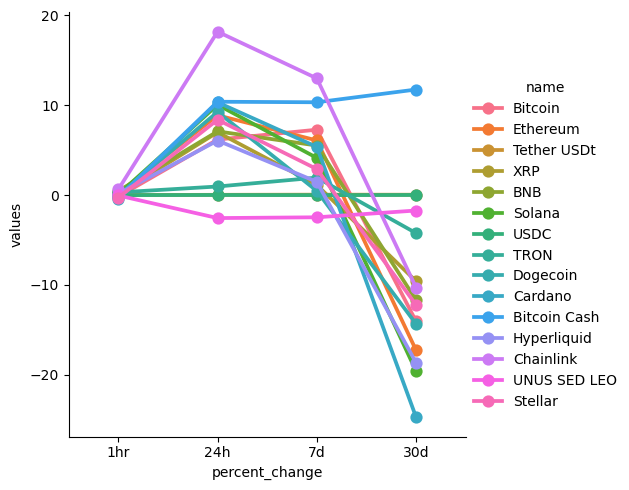

In [75]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')